In [1]:
import pandas as pd
import numpy as np

# Load dataset
file_path = '/Users/allig/ads/508/leo_objects.csv'
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24062 entries, 0 to 24061
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     24062 non-null  int64  
 1   INTLDES        24062 non-null  object 
 2   NORAD_CAT_ID   24062 non-null  int64  
 3   OBJECT_TYPE    24062 non-null  object 
 4   SATNAME        24062 non-null  object 
 5   COUNTRY        24062 non-null  object 
 6   LAUNCH         24062 non-null  object 
 7   SITE           24062 non-null  object 
 8   DECAY          0 non-null      float64
 9   PERIOD         24062 non-null  float64
 10  INCLINATION    24062 non-null  float64
 11  APOGEE         24062 non-null  int64  
 12  PERIGEE        24062 non-null  int64  
 13  COMMENT        0 non-null      float64
 14  COMMENTCODE    1454 non-null   float64
 15  RCSVALUE       24062 non-null  int64  
 16  RCS_SIZE       23778 non-null  object 
 17  FILE           24062 non-null  int64  
 18  LAUNCH

,Unnamed: 0,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,0,1975-052MT,42658,DEBRIS,DELTA 1 DEB,US,1975-06-12,AFWTR,NaN,114.21,...,0,SMALL,7337,1975,52,MT,Y,DELTA 1 DEB,1975-052MT,42658
1,1,1974-089GR,42624,DEBRIS,THORAD DELTA 1 DEB,US,1974-11-15,AFWTR,NaN,113.05,...,0,SMALL,7337,1974,89,GR,Y,THORAD DELTA 1 DEB,1974-089GR,42624
2,2,1974-089GK,42618,DEBRIS,THORAD DELTA 1 DEB,US,1974-11-15,AFWTR,NaN,116.74,...,0,SMALL,7337,1974,89,GK,Y,THORAD DELTA 1 DEB,1974-089GK,42618
3,3,1970-025SE,42524,DEBRIS,THORAD AGENA D DEB,US,1970-04-08,AFWTR,NaN,105.35,...,0,SMALL,7337,1970,25,SE,Y,THORAD AGENA D DEB,1970-025SE,42524
4,4,1970-025RZ,42519,DEBRIS,THORAD AGENA D DEB,US,1970-04-08,AFWTR,NaN,104.41,...,0,SMALL,7337,1970,25,RZ,Y,THORAD AGENA D DEB,1970-025RZ,42519


In [2]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Updated Column Names:\n", df.columns)


Updated Column Names:
 Index(['unnamed:_0', 'intldes', 'norad_cat_id', 'object_type', 'satname',
       'country', 'launch', 'site', 'decay', 'period', 'inclination', 'apogee',
       'perigee', 'comment', 'commentcode', 'rcsvalue', 'rcs_size', 'file',
       'launch_year', 'launch_num', 'launch_piece', 'current', 'object_name',
       'object_id', 'object_number'],
      dtype='object')


In [3]:
# Drop columns where more than 50% of values are missing
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna("Unknown")
    else:  # Numeric columns
        df[col] = df[col].fillna(df[col].median())

# Verify missing values
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 unnamed:_0       0
intldes          0
norad_cat_id     0
object_type      0
satname          0
country          0
launch           0
site             0
period           0
inclination      0
apogee           0
perigee          0
rcsvalue         0
rcs_size         0
file             0
launch_year      0
launch_num       0
launch_piece     0
current          0
object_name      0
object_id        0
object_number    0
dtype: int64


In [4]:
# Convert date columns if applicable 
date_columns = ["launch_date"]  # Modify based on actual column names
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Convert categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].astype("category")

# Check data types after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24062 entries, 0 to 24061
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   unnamed:_0     24062 non-null  int64   
 1   intldes        24062 non-null  category
 2   norad_cat_id   24062 non-null  int64   
 3   object_type    24062 non-null  category
 4   satname        24062 non-null  category
 5   country        24062 non-null  category
 6   launch         24062 non-null  category
 7   site           24062 non-null  category
 8   period         24062 non-null  float64 
 9   inclination    24062 non-null  float64 
 10  apogee         24062 non-null  int64   
 11  perigee        24062 non-null  int64   
 12  rcsvalue       24062 non-null  int64   
 13  rcs_size       24062 non-null  category
 14  file           24062 non-null  int64   
 15  launch_year    24062 non-null  int64   
 16  launch_num     24062 non-null  int64   
 17  launch_piece   24062 non-null  

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

print(f"Dataset now has {df.shape[0]} rows and {df.shape[1]} columns after removing duplicates.")


Dataset now has 24062 rows and 22 columns after removing duplicates.


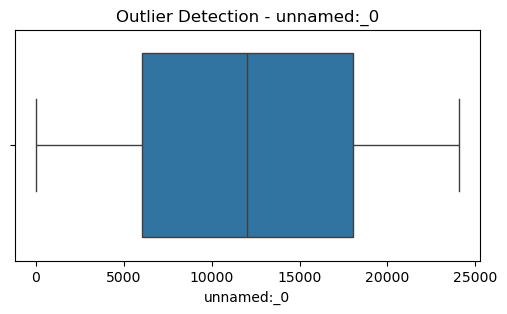

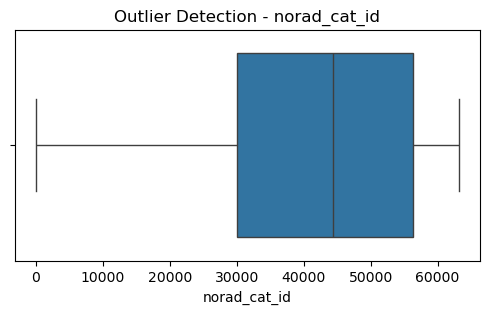

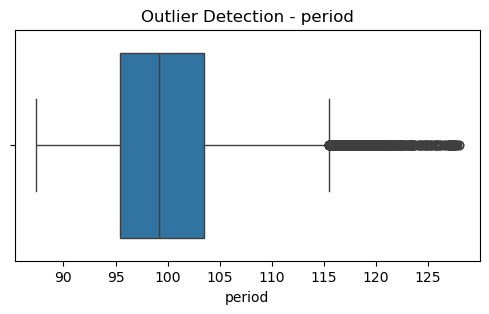

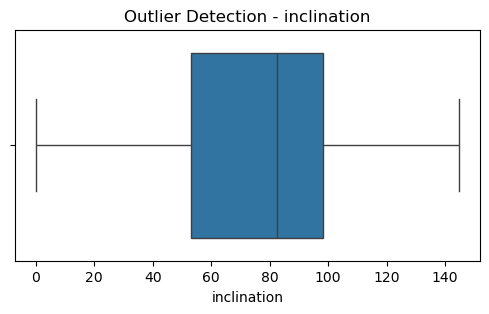

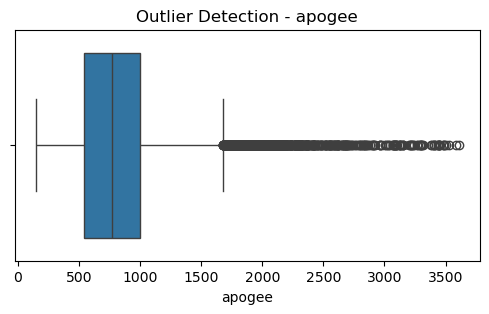

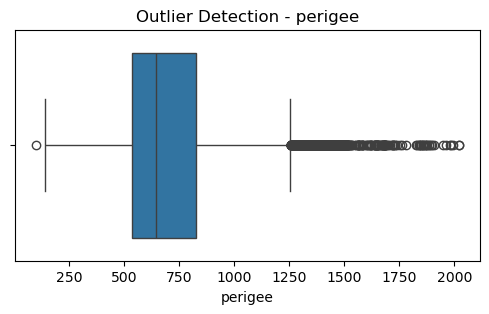

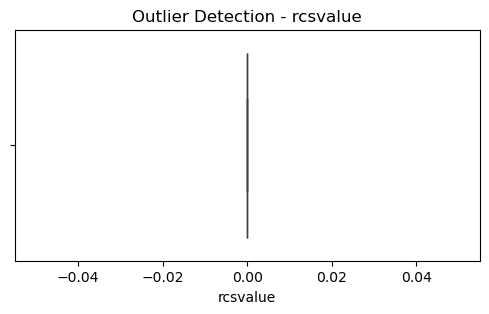

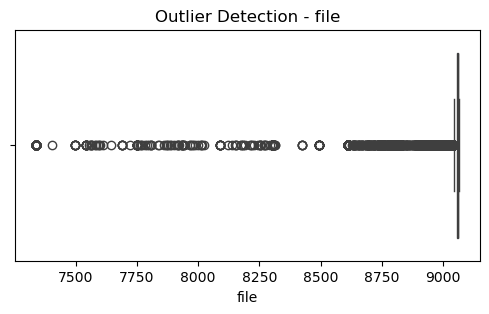

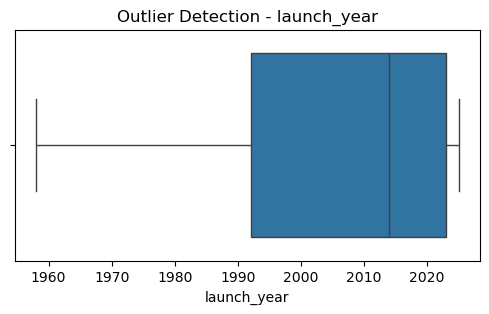

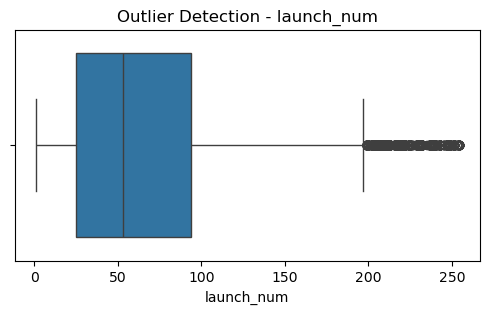

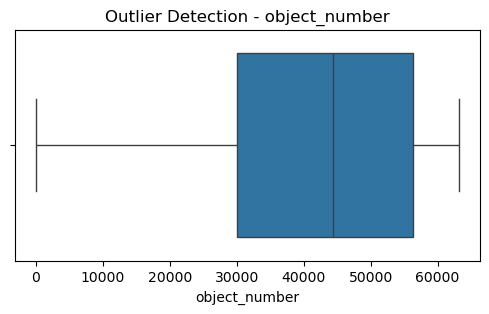

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify outliers using box plots
numerical_cols = df.select_dtypes(include=["number"]).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()


In [7]:
# Remove outliers beyond 3 standard deviations
for col in numerical_cols:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]

print("Outliers removed.")


Outliers removed.


In [9]:
# Save cleaned dataset
cleaned_file_path = '/Users/allig/ads/508/leo_objects_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: /Users/allig/ads/508/leo_objects_cleaned.csv
